In [28]:
%load_ext autoreload
%autoreload 2

from transformers import AutoModelForMaskedLM
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys
from os.path import expanduser
sys.path.insert(0, expanduser("~/nta/nupic.research/projects/transformers"))

from callbacks import (
    get_density_by_layer,
    plot_density_per_layer,
    plot_density_delta,
    calc_sparsity,
    calc_model_sparsity
) # functions to calculate density per layer
import models  # required to update the config dict


from nupic.research.frameworks.pytorch.model_utils import (
    count_nonzero_params,
    filter_modules,
)
from nupic.torch.modules.sparse_weights import SparseWeightsBase

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# List of models
# see https://docs.google.com/spreadsheets/d/16Jc7_pqoRkokPbMS2ffoqKG5suC3gPr4-JYOc-FmNvI/edit?usp=sharing
# List of models
# see https://docs.google.com/spreadsheets/d/16Jc7_pqoRkokPbMS2ffoqKG5suC3gPr4-JYOc-FmNvI/edit?usp=sharing

bert_bases = ["/mnt/efs/results/pretrained-models/transformers-local/bert_sparse_80%_trifecta_100k",
"/mnt/efs/results/pretrained-models/transformers-local/bert_sparse_85%_trifecta_100k",
"/mnt/efs/results/pretrained-models/transformers-local/bert_sparse_90%_trifecta_100k",
"/mnt/efs/results/pretrained-models/transformers-local/bert_sparse_2x_trifecta_100k"]


small_berts = ["/mnt/efs/results/pretrained-models/transformers-local/small_bert_80%_trifecta_100k",
"/mnt/efs/results/pretrained-models/transformers-local/small_bert_85%_trifecta_100k",
"/mnt/efs/results/pretrained-models/transformers-local/small_bert_90%_trifecta_100k",
"/mnt/efs/results/pretrained-models/transformers-local/small_bert_2x_trifecta_100k",
"/mnt/efs/results/pretrained-models/transformers-local/small_bert_4x_trifecta_100k"]




In [12]:
# Load the model, calculate sparsity
for model_path in bert_bases[:1]:
    print(model_path)
    model = AutoModelForMaskedLM.from_pretrained(
        model_path, use_auth_token=False, local_files_only=True        
    )


/mnt/efs/results/pretrained-models/transformers-local/bert_sparse_80%_trifecta_100k


<AxesSubplot:xlabel='layer', ylabel='density'>

<Figure size 1440x720 with 0 Axes>

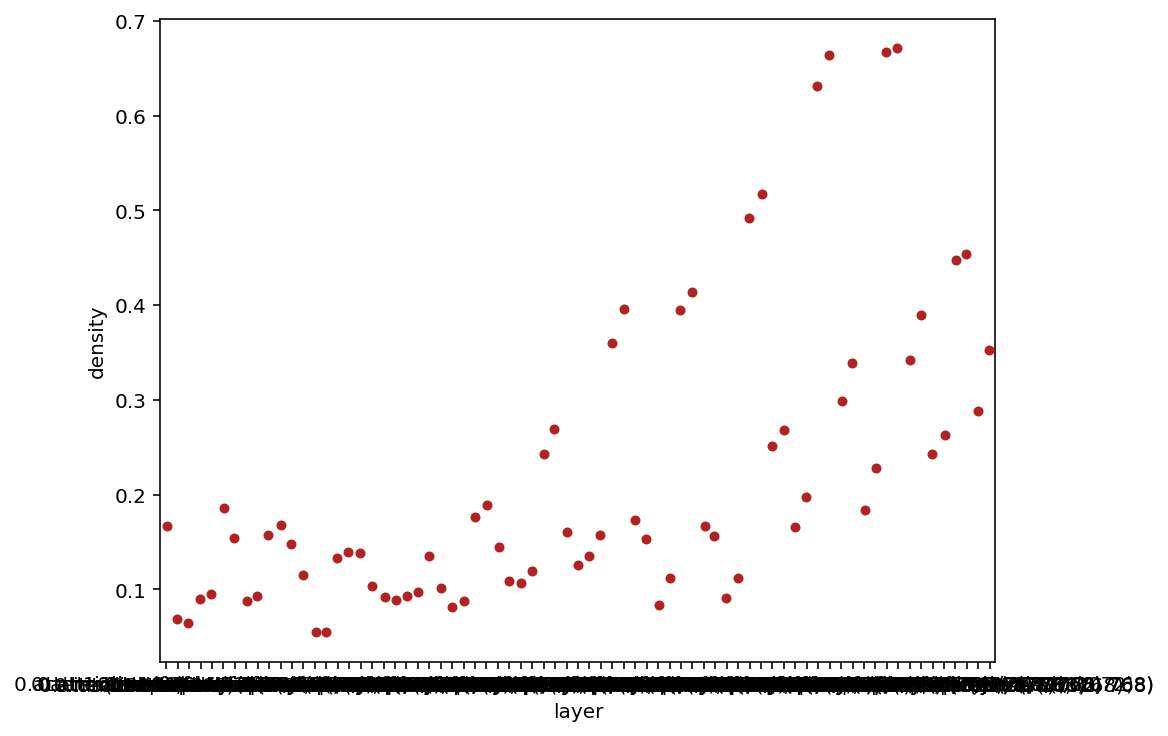

In [14]:
sparse_modules = filter_modules(model, include_modules=[SparseWeightsBase])
df_density_by_layer = get_density_by_layer(sparse_modules)
plot_density_per_layer(df_density_by_layer)

In [31]:
def custom_plot_density_per_layer(df_density_by_layer, initial_density=None):
    plt.xticks(rotation=90)
    sns.stripplot(
        data=df_density_by_layer,
        y="density",
        x="layer",
        hue=None,
        color="firebrick",
    )

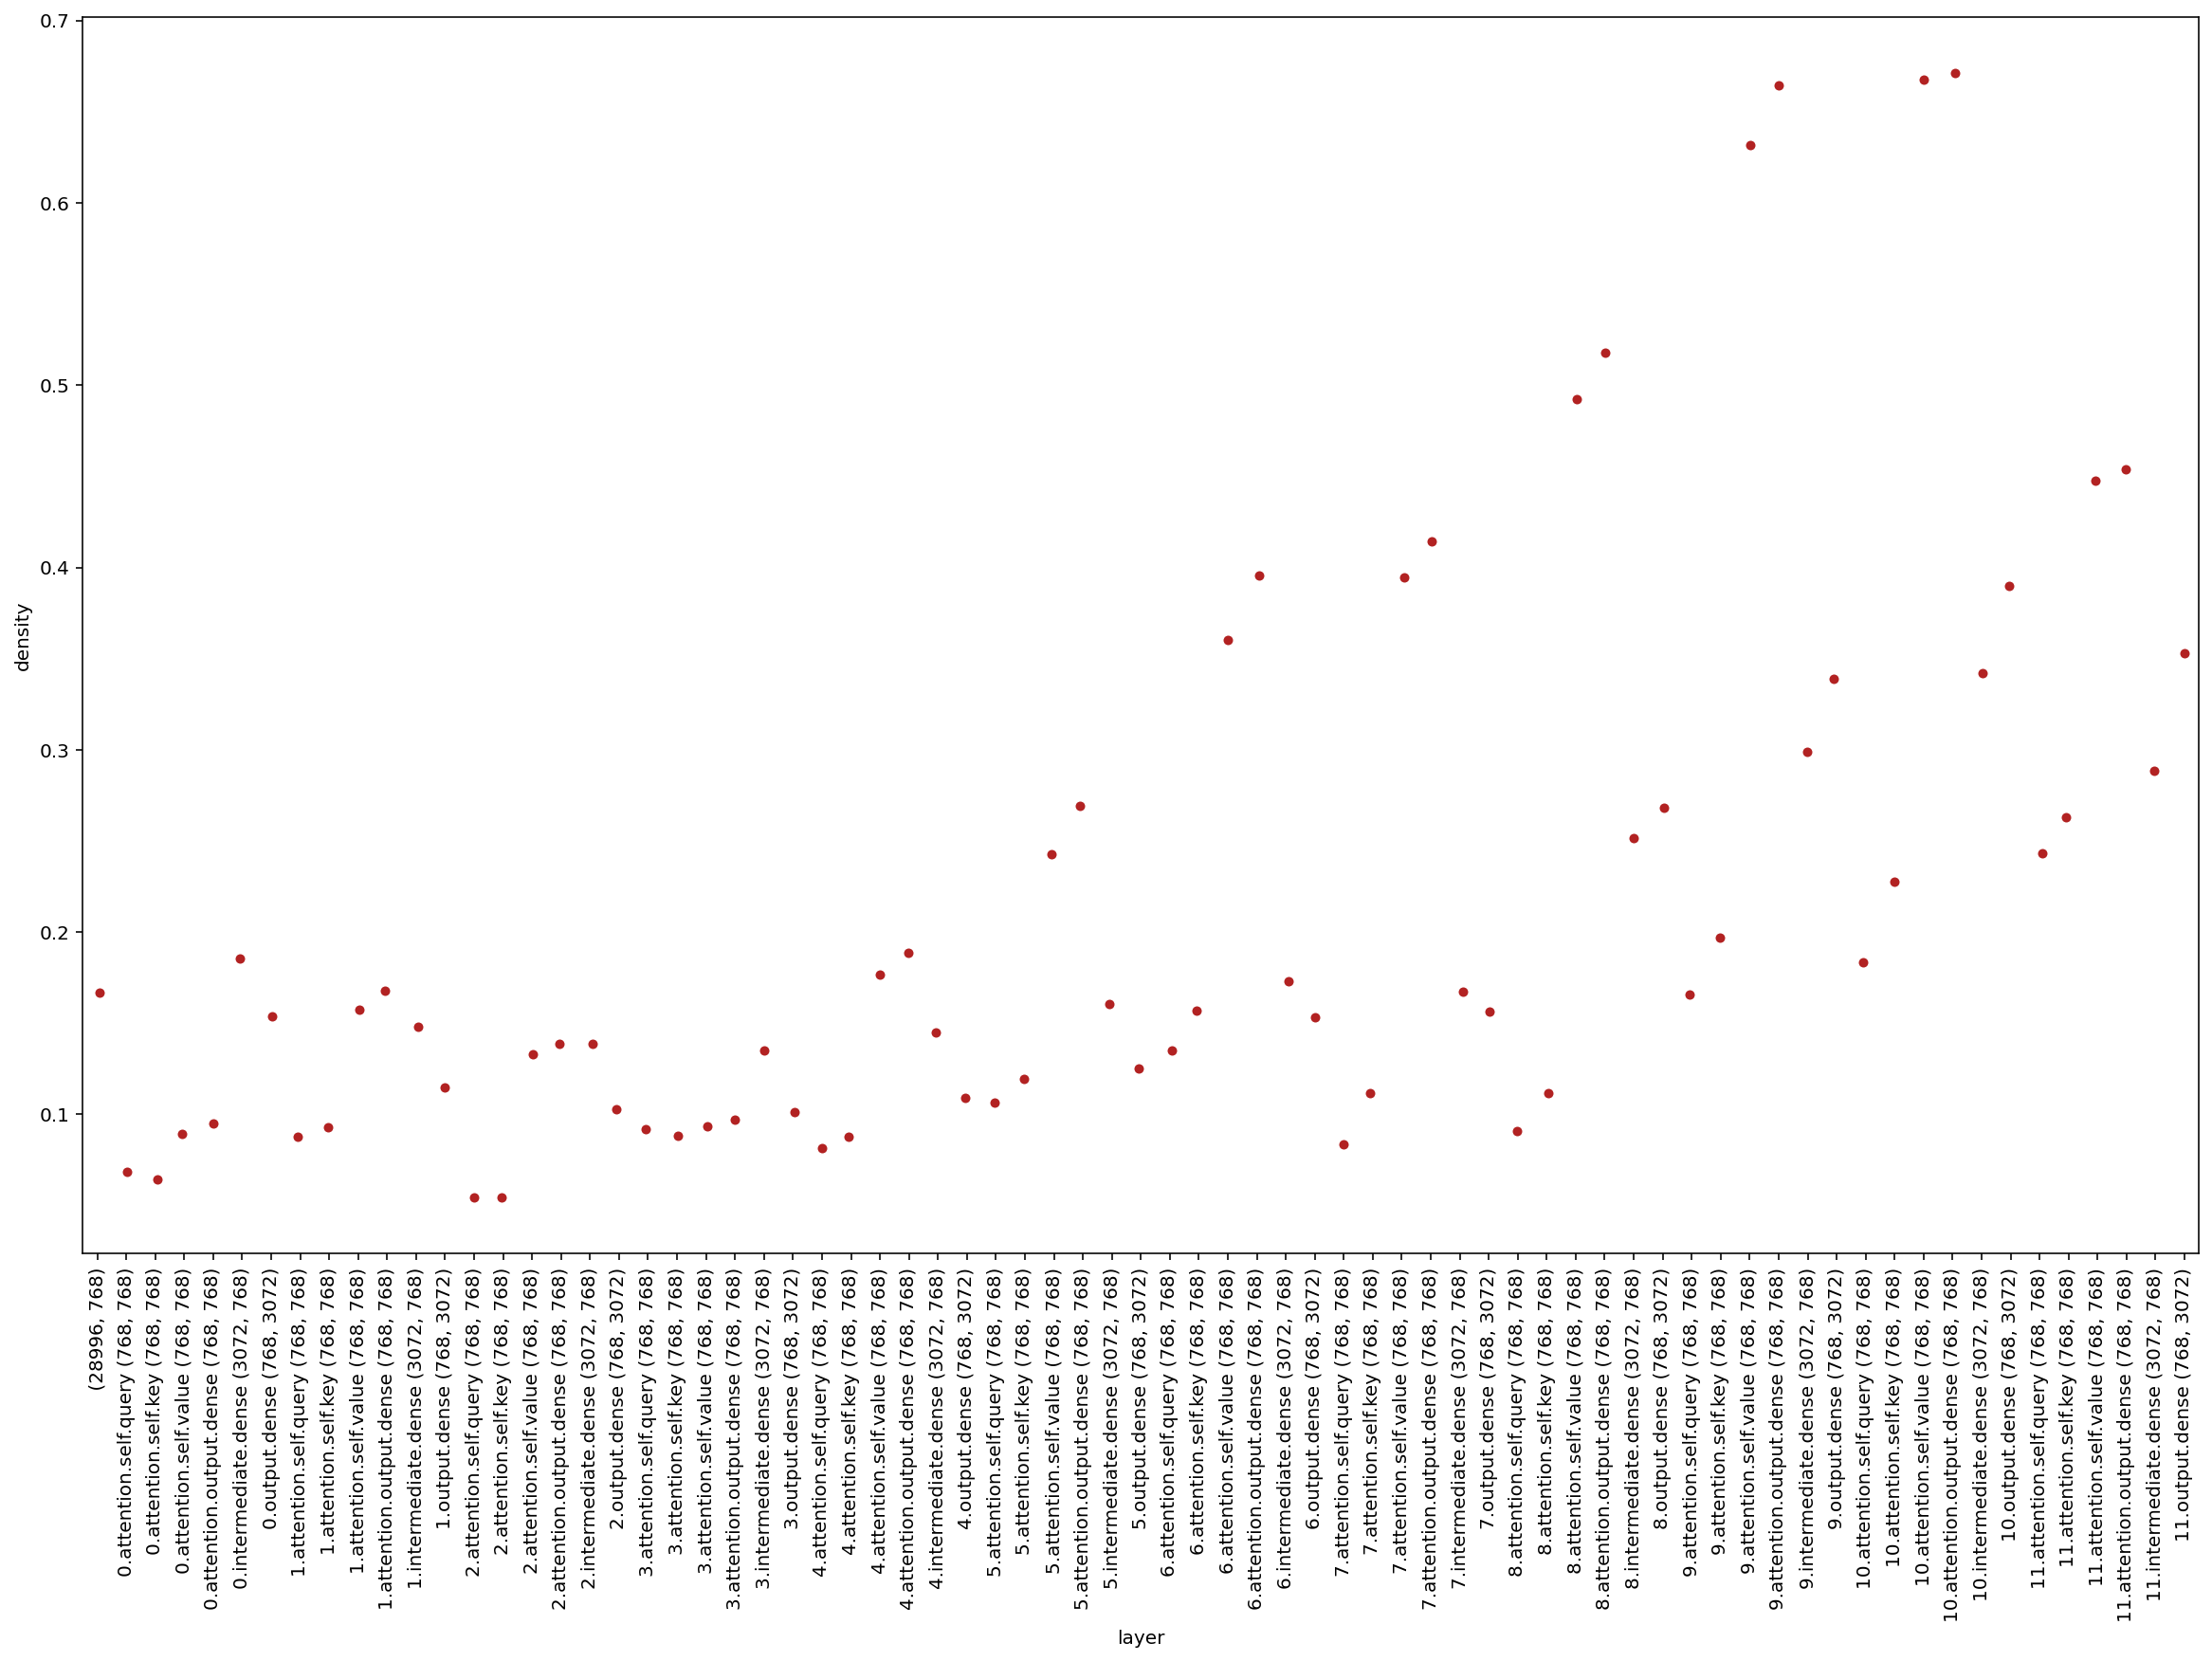

In [32]:
rcParams['figure.figsize'] = 20,12
custom_plot_density_per_layer(df_density_by_layer)

In [33]:
df_density_by_layer

,layer,density
0,"(28996, 768)",tensor(0.1666)
1,"0.attention.self.query (768, 768)",tensor(0.0686)
2,"0.attention.self.key (768, 768)",tensor(0.0641)
3,"0.attention.self.value (768, 768)",tensor(0.0892)
4,"0.attention.output.dense (768, 768)",tensor(0.0950)
...,...,...
68,"11.attention.self.key (768, 768)",tensor(0.2627)
69,"11.attention.self.value (768, 768)",tensor(0.4474)
70,"11.attention.output.dense (768, 768)",tensor(0.4537)
71,"11.intermediate.dense (3072, 768)",tensor(0.2886)
